# PCA — zbiór Wine



## 1. Przygotowanie danych

**Dlaczego standaryzacja jest konieczna przed PCA?**
- PCA opiera się na wariancji i kowariancji. Jeżeli cechy mają różne skale (np. `Proline` ma wartości rzędu setek, a inne rzędu jedności), to cechy o większej skali zdominują analizę.
- Standaryzacja (średnia 0, odchylenie 1) wyrównuje wkład cech i sprawia, że PCA analizuje strukturę korelacji, a nie różnice w jednostkach.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# 1.1 Załaduj zbiór danych Wine
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print("Liczba próbek:", X.shape[0])
print("Liczba cech:", X.shape[1])
print("\nNazwy cech:")
for i, f in enumerate(feature_names, 1):
    print(f"{i:>2}. {f}")
print("\nRozkład klas (0/1/2):", np.bincount(y))
print("Nazwy klas:", list(target_names))


Liczba próbek: 178
Liczba cech: 13

Nazwy cech:
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

Rozkład klas (0/1/2): [59 71 48]
Nazwy klas: [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]


In [3]:
# 1.3 Standaryzacja
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Szybka kontrola: średnie ~0, odchylenia ~1
print("Średnie (pierwsze 5):", np.mean(X_std, axis=0)[:5])
print("Odchylenia std (pierwsze 5):", np.std(X_std, axis=0, ddof=0)[:5])


Średnie (pierwsze 5): [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17]
Odchylenia std (pierwsze 5): [1. 1. 1. 1. 1.]


## 2. Wykonanie PCA
Wykonamy PCA dla wszystkich składowych, a następnie pokażemy wartości własne (wariancje składowych), procent wyjaśnionej wariancji i wariancję skumulowaną.


In [15]:
# 2.1 PCA (wszystkie składowe)
pca = PCA()
X_pca = pca.fit_transform(X_std)

# 2.2 Wartości własne (wariancje składowych) i wyjaśniona wariancja
eigenvalues = pca.explained_variance_          # wariancje PC (wartości własne macierzy kowariancji)
explained_ratio = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained_ratio)

results = pd.DataFrame({
    "PC": [f"PC{i}" for i in range(1, len(eigenvalues)+1)],
    "Wartość własna": eigenvalues,
    "% wyjaśnionej wariancji": explained_ratio*100,
    "% skumulowane": cum_explained*100
})
results


,PC,Wartość własna,% wyjaśnionej wariancji,% skumulowane
0,PC1,4.732437,36.198848,36.198848
1,PC2,2.511081,19.207490,55.406338
2,PC3,1.454242,11.123631,66.529969
3,PC4,0.924166,7.069030,73.598999
4,PC5,0.858049,6.563294,80.162293
5,PC6,0.645282,4.935823,85.098116
6,PC7,0.554141,4.238679,89.336795
7,PC8,0.350466,2.680749,92.017544
8,PC9,0.290512,2.222153,94.239698
9,PC10,0.252320,1.930019,96.169717


In [5]:
# 2.3 Ile składowych potrzeba dla >= 80% wariancji?
n80 = int(np.argmax(cum_explained >= 0.80) + 1)
n90 = int(np.argmax(cum_explained >= 0.90) + 1)
n95 = int(np.argmax(cum_explained >= 0.95) + 1)

print(f"Liczba składowych dla >=80%: {n80}")
print(f"Liczba składowych dla >=90%: {n90}")
print(f"Liczba składowych dla >=95%: {n95}")


Liczba składowych dla >=80%: 5
Liczba składowych dla >=90%: 8
Liczba składowych dla >=95%: 10


## 3. Wizualizacja
### 3.1 Scree plot (zaznaczenie „łokcia”)
Zwykle „łokieć” widać tam, gdzie kolejne składowe dają już niewielki przyrost wariancji.


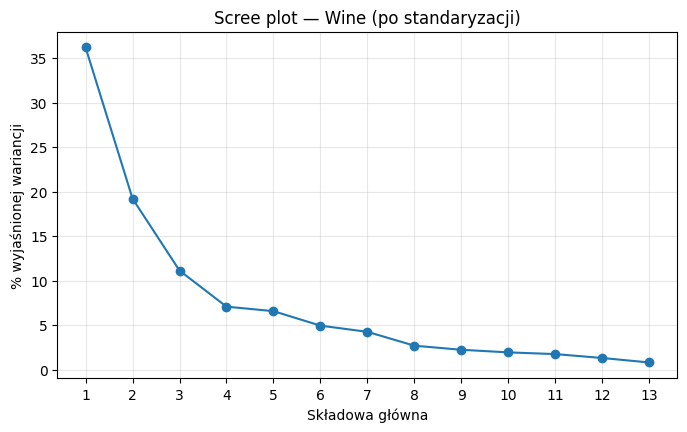

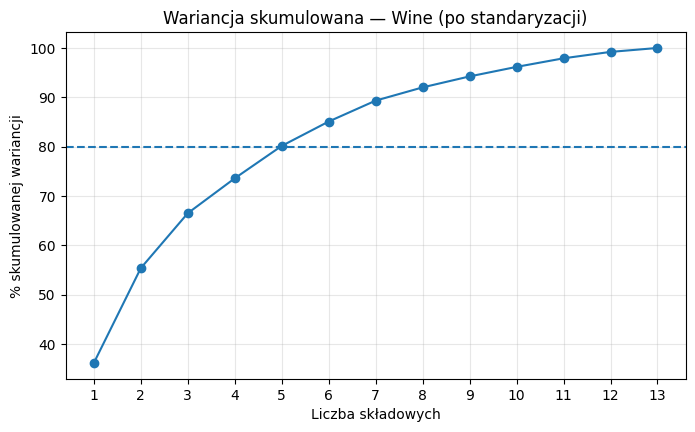

In [6]:
pcs = np.arange(1, len(explained_ratio)+1)

plt.figure(figsize=(8,4.5))
plt.plot(pcs, explained_ratio*100, marker="o")
plt.xticks(pcs)
plt.xlabel("Składowa główna")
plt.ylabel("% wyjaśnionej wariancji")
plt.title("Scree plot — Wine (po standaryzacji)")
plt.grid(True, alpha=0.3)
plt.show()

# Dodatkowo wykres skumulowany
plt.figure(figsize=(8,4.5))
plt.plot(pcs, cum_explained*100, marker="o")
plt.xticks(pcs)
plt.axhline(80, linestyle="--")
plt.xlabel("Liczba składowych")
plt.ylabel("% skumulowanej wariancji")
plt.title("Wariancja skumulowana — Wine (po standaryzacji)")
plt.grid(True, alpha=0.3)
plt.show()


### 3.2 Projekcja 2D (PC1 vs PC2)


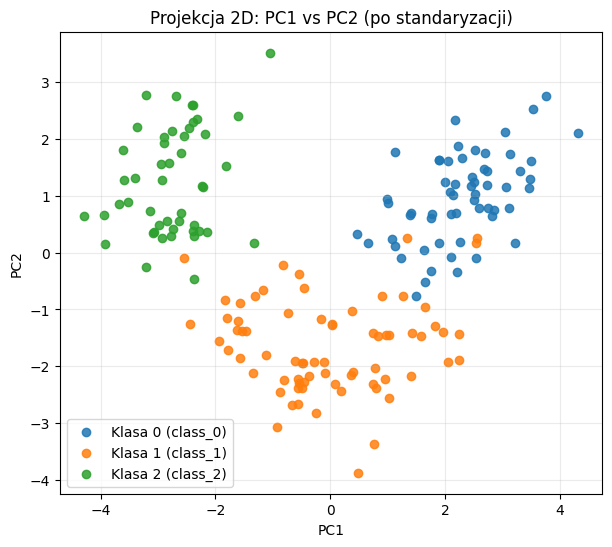

In [7]:
plt.figure(figsize=(7,6))
for cls in np.unique(y):
    mask = (y == cls)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f"Klasa {cls} ({target_names[cls]})", alpha=0.85)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projekcja 2D: PC1 vs PC2 (po standaryzacji)")
plt.legend()
plt.grid(True, alpha=0.25)
plt.show()


### 3.3 Biplot (punkty + wektory cech)
Wektory cech to ładunki (loadings) dla PC1 i PC2. Dla czytelności skalujemy je współczynnikiem.


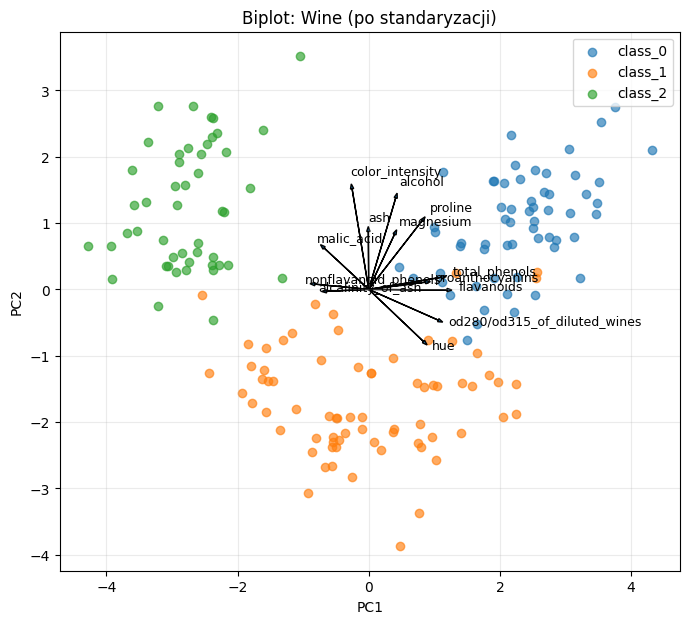

In [8]:
# Ładunki: komponenty PCA (PC x cechy).
# W sklearn: pca.components_ ma kształt (n_components, n_features).
loadings = pca.components_.T  # (cechy, PC)

# Biplot
scale = 3.0  # współczynnik wizualny (możesz zmieniać)
plt.figure(figsize=(8,7))

# punkty w przestrzeni PC1-PC2
for cls in np.unique(y):
    mask = (y == cls)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f"{target_names[cls]}", alpha=0.65)

# wektory cech
for i, feat in enumerate(feature_names):
    x_vec = loadings[i, 0] * scale
    y_vec = loadings[i, 1] * scale
    plt.arrow(0, 0, x_vec, y_vec, head_width=0.05, length_includes_head=True)
    plt.text(x_vec*1.08, y_vec*1.08, feat, fontsize=9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot: Wine (po standaryzacji)")
plt.grid(True, alpha=0.25)
plt.legend()
plt.show()


## 4. Interpretacja
### 4.1 Ładunki (loadings) dla PC1 i PC2
Im większa wartość bezwzględna ładunku, tym mocniej dana cecha wpływa na składową.


In [9]:
load_df = pd.DataFrame({
    "Cecha": feature_names,
    "Loading_PC1": loadings[:, 0],
    "Loading_PC2": loadings[:, 1],
    "Abs_PC1": np.abs(loadings[:, 0]),
    "Abs_PC2": np.abs(loadings[:, 1]),
}).sort_values("Abs_PC1", ascending=False)

load_df[["Cecha","Loading_PC1","Loading_PC2","Abs_PC1","Abs_PC2"]]


,Cecha,Loading_PC1,Loading_PC2,Abs_PC1,Abs_PC2
6,flavanoids,0.422934,-0.003360,0.422934,0.003360
5,total_phenols,0.394661,0.065040,0.394661,0.065040
11,od280/od315_of_diluted_wines,0.376167,-0.164496,0.376167,0.164496
8,proanthocyanins,0.313429,0.039302,0.313429,0.039302
7,nonflavanoid_phenols,-0.298533,0.028779,0.298533,0.028779
10,hue,0.296715,-0.279235,0.296715,0.279235
12,proline,0.286752,0.364903,0.286752,0.364903
1,malic_acid,-0.245188,0.224931,0.245188,0.224931
3,alcalinity_of_ash,-0.239320,-0.010591,0.239320,0.010591
0,alcohol,0.144329,0.483652,0.144329,0.483652


In [10]:
top_pc1 = load_df.sort_values("Abs_PC1", ascending=False).head(5)[["Cecha","Loading_PC1","Abs_PC1"]]
top_pc2 = load_df.sort_values("Abs_PC2", ascending=False).head(5)[["Cecha","Loading_PC2","Abs_PC2"]]

print("Top 5 cech wg |loading| dla PC1:")
display(top_pc1)

print("Top 5 cech wg |loading| dla PC2:")
display(top_pc2)


Top 5 cech wg |loading| dla PC1:


,Cecha,Loading_PC1,Abs_PC1
6,flavanoids,0.422934,0.422934
5,total_phenols,0.394661,0.394661
11,od280/od315_of_diluted_wines,0.376167,0.376167
8,proanthocyanins,0.313429,0.313429
7,nonflavanoid_phenols,-0.298533,0.298533


Top 5 cech wg |loading| dla PC2:


,Cecha,Loading_PC2,Abs_PC2
9,color_intensity,0.529996,0.529996
0,alcohol,0.483652,0.483652
12,proline,0.364903,0.364903
2,ash,0.316069,0.316069
4,magnesium,0.299634,0.299634


### 4.2 Odpowiedzi interpretacyjne
- **Które cechy dominują w PC1?** Zwykle to te z największym `|Loading_PC1|` (patrz tabela `Top 5`).
- **Co reprezentuje PC1?** Najczęściej „oś” opisująca wspólny trend cech silnie skorelowanych (np. związki fenolowe/kolor/OD280… albo alkohol + proline — zależnie od znaków i wartości ładunków).
- **Które cechy dominują w PC2?** Analogicznie: największe `|Loading_PC2|`.
- **Czy klasy są dobrze separowalne w 2D?** Oceń to na wykresie PC1–PC2: jeżeli chmury punktów klas mają małe nakładanie, separacja jest dobra.

Znaki ładunków (plus/minus) mówią o kierunku; istotność dla „dominacji” ocenia się po wartości bezwzględnej.


## 5. Wpływ standaryzacji
Wykonamy PCA *bez* standaryzacji i porównamy wyjaśnioną wariancję oraz projekcję 2D.


Poziom wariancji skumulowanej (bez standaryzacji) — pierwsze 5 PC:
PC1: 99.81%
PC2: 99.98%
PC3: 99.99%
PC4: 100.00%
PC5: 100.00%


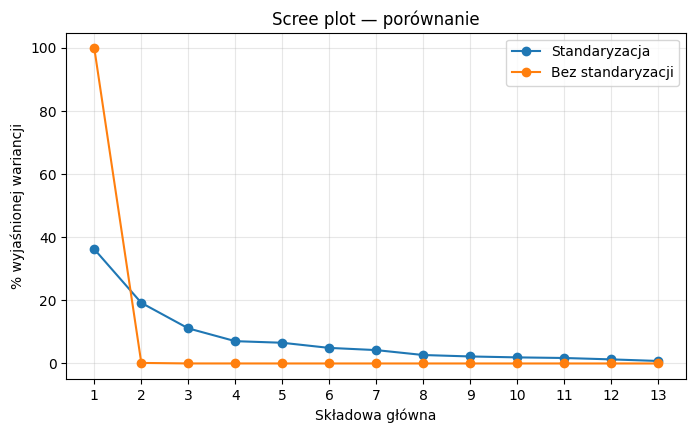

In [11]:
pca_raw = PCA()
X_pca_raw = pca_raw.fit_transform(X)

explained_raw = pca_raw.explained_variance_ratio_
cum_raw = np.cumsum(explained_raw)

print("Poziom wariancji skumulowanej (bez standaryzacji) — pierwsze 5 PC:")
for i in range(5):
    print(f"PC{i+1}: {cum_raw[i]*100:.2f}%")

# Scree porównawcze (stand vs raw)
pcs = np.arange(1, len(explained_ratio)+1)

plt.figure(figsize=(8,4.5))
plt.plot(pcs, explained_ratio*100, marker="o", label="Standaryzacja")
plt.plot(pcs, explained_raw*100, marker="o", label="Bez standaryzacji")
plt.xticks(pcs)
plt.xlabel("Składowa główna")
plt.ylabel("% wyjaśnionej wariancji")
plt.title("Scree plot — porównanie")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


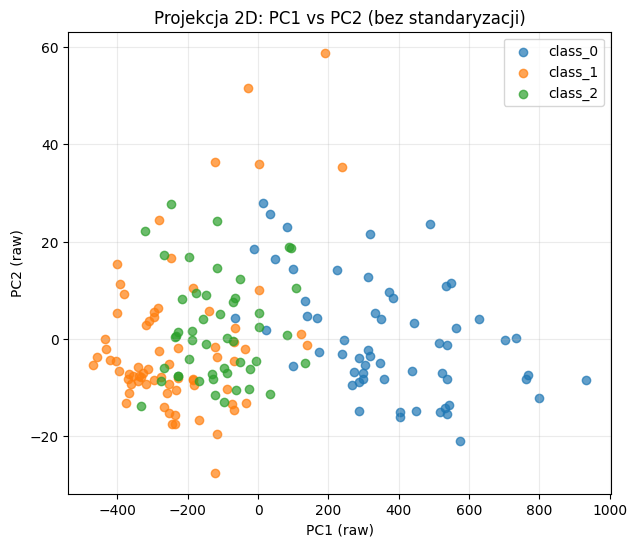

In [12]:
# Projekcja 2D bez standaryzacji
plt.figure(figsize=(7,6))
for cls in np.unique(y):
    mask = (y == cls)
    plt.scatter(X_pca_raw[mask, 0], X_pca_raw[mask, 1], label=f"{target_names[cls]}", alpha=0.7)

plt.xlabel("PC1 (raw)")
plt.ylabel("PC2 (raw)")
plt.title("Projekcja 2D: PC1 vs PC2 (bez standaryzacji)")
plt.legend()
plt.grid(True, alpha=0.25)
plt.show()


### 5.3 Która cecha zdominowała analizę bez standaryzacji?
Można to oszacować patrząc na ładunki PC1 w PCA bez standaryzacji — największy `|loading|` w PC1 często wskazuje cechę dominującą (zwykle o największej skali/liczbowym rozrzucie).


In [13]:
loadings_raw = pca_raw.components_.T
load_raw_df = pd.DataFrame({
    "Cecha": feature_names,
    "Loading_PC1_raw": loadings_raw[:, 0],
    "Abs_PC1_raw": np.abs(loadings_raw[:, 0]),
}).sort_values("Abs_PC1_raw", ascending=False)

load_raw_df.head(10)


,Cecha,Loading_PC1_raw,Abs_PC1_raw
12,proline,0.999823,0.999823
4,magnesium,0.017868,0.017868
3,alcalinity_of_ash,-0.004671,0.004671
9,color_intensity,0.002327,0.002327
0,alcohol,0.001659,0.001659
6,flavanoids,0.001567,0.001567
5,total_phenols,0.000990,0.000990
11,od280/od315_of_diluted_wines,0.000705,0.000705
1,malic_acid,-0.000681,0.000681
8,proanthocyanins,0.000601,0.000601


## 6. PCA jako preprocessing dla klasyfikacji (k-NN)
Porównamy accuracy i czas treningu dla:
- oryginalnych danych (13 cech)
- PCA (2 składowe)
- PCA (5 składowych)

Użyjemy podziału 80/20, standaryzacji, a następnie k-NN.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import time

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

def eval_pipeline(pipe, name):
    t0 = time.perf_counter()
    pipe.fit(X_train, y_train)
    train_time = time.perf_counter() - t0

    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return {"Model": name, "Accuracy": acc, "Czas_treningu_s": train_time}

# k-NN (parametry możesz zmieniać)
k = 5

# 1) Oryginalne dane (ale ze standaryzacją w pipeline!)
pipe_orig = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=k))
])

# 2) PCA 2 składowe
pipe_pca2 = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("knn", KNeighborsClassifier(n_neighbors=k))
])

# 3) PCA 5 składowych
pipe_pca5 = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5)),
    ("knn", KNeighborsClassifier(n_neighbors=k))
])

rows = []
rows.append(eval_pipeline(pipe_orig, "kNN: oryginalne (13 cech)"))
rows.append(eval_pipeline(pipe_pca2, "kNN: PCA (2 składowe)"))
rows.append(eval_pipeline(pipe_pca5, "kNN: PCA (5 składowych)"))

pd.DataFrame(rows).sort_values("Accuracy", ascending=False)


,Model,Accuracy,Czas_treningu_s
2,kNN: PCA (5 składowych),1.000000,0.008765
0,kNN: oryginalne (13 cech),0.972222,0.008802
1,kNN: PCA (2 składowe),0.916667,0.005942
